# Task3 :Exploratory Data Analysis - Retail

# Perform 'Exploratory Data Analysis' on dataset 'SampleSuperstore' 

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing the data
data = pd.read_csv('SampleSuperstore.csv')

In [4]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
data.shape

(9994, 13)

# Exploratory Data Analysis

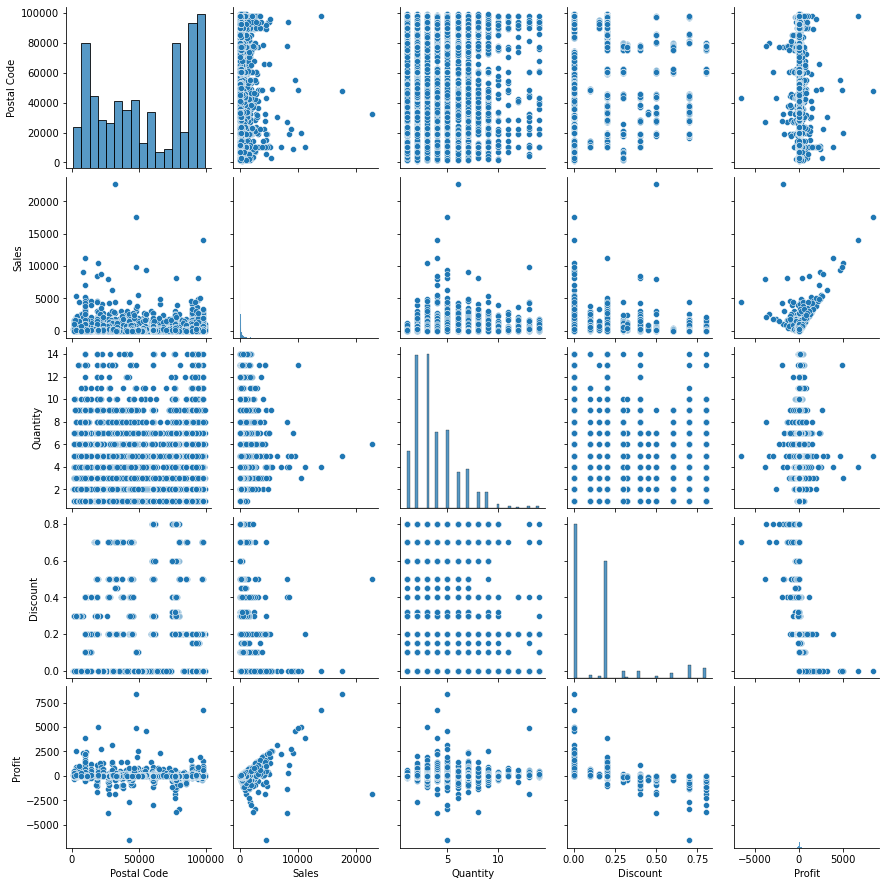

In [8]:
sns.pairplot(data=data)

<AxesSubplot:>

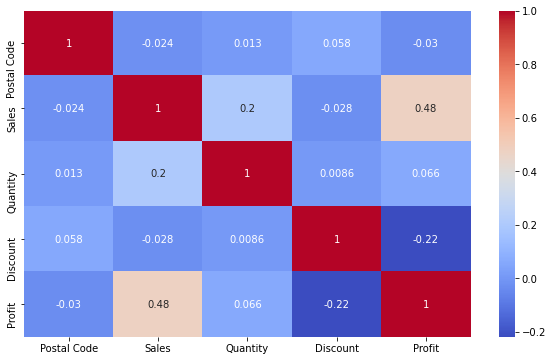

In [41]:
plt.figure(figsize=(10,6))
data_corr=data.corr()
sns.heatmap(data=data_corr,annot=True,cmap='coolwarm')

In [42]:
data['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

<AxesSubplot:>

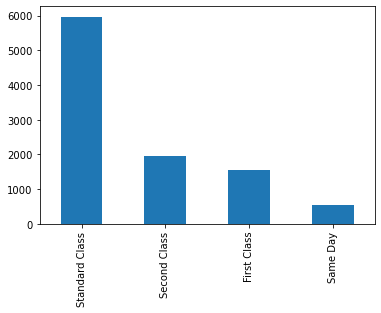

In [43]:
data['Ship Mode'].value_counts().plot(kind='bar')

In [44]:
#City Analysis

city = []
cities = data.groupby('City') 
for i,df in cities: 
    city.append(i) 
print(len(city))

531


In [45]:
data['City'].value_counts()

New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Missouri City        1
Port Orange          1
Conway               1
San Luis Obispo      1
Pico Rivera          1
Name: City, Length: 531, dtype: int64

In [46]:
data['City'].value_counts().max() 

915

# The performance of the Store is best in New York City

In [47]:
state = [] 
states = data.groupby('State') 
for i,df in states:
    state.append(i) 
print(len(state))

49


In [48]:
data['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

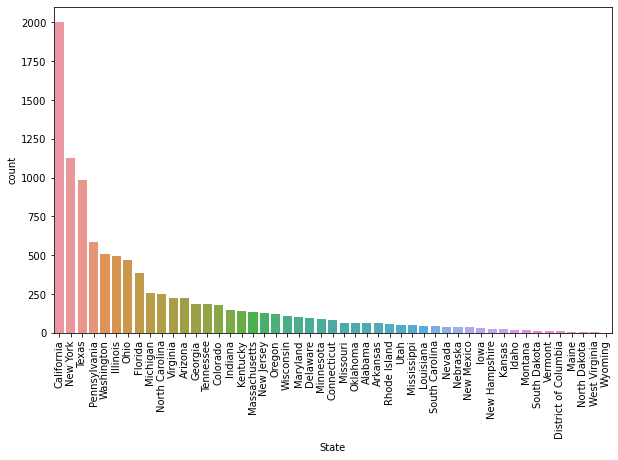

In [49]:
plt.figure(figsize=(10,6)) 
sns.countplot(x='State',data=data,order=data['State'].value_counts().index) 
plt.xticks(rotation=90) 
plt.show()

California providing the best sales compare to rest of the states in USA

# Region Analysis

In [50]:
data['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

<AxesSubplot:>

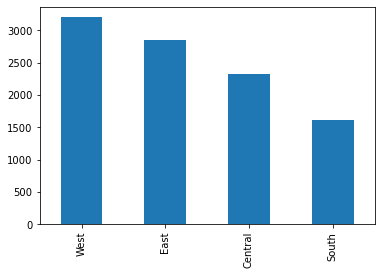

In [51]:
data['Region'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Region', ylabel='count'>

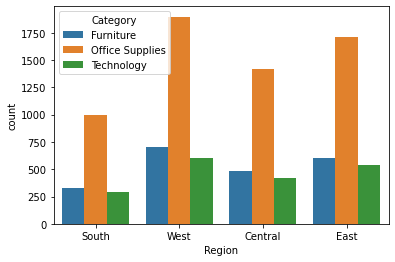

In [52]:

sns.countplot(x=data['Region'], hue=data['Category'])
              

Text(0.5, 1.0, 'Region-wise Profit and Sales')

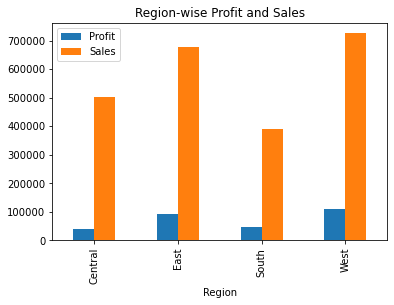

In [53]:

data.groupby('Region')['Profit','Sales'].agg('sum').plot.bar() 
plt.legend(loc='upper left') 
plt.title('Region-wise Profit and Sales')


Both Profit and Sales are high in the Western Part of USA. But the Organization has to concenterate more on the South!

In [54]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

Text(0.5, 1.0, 'Categories of Products Sold')

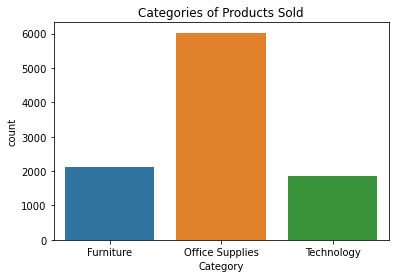

In [55]:
sns.countplot(x=data['Category']) 
plt.title('Categories of Products Sold')

Text(0.5, 1.0, 'Region-wise Product Categories')

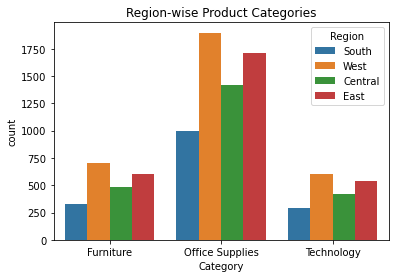

In [56]:

sns.countplot(x=data['Category'], hue=data['Region']) 
plt.title('Region-wise Product Categories')


Office Supplies wins the battle with Furniture and Technology products on all parts of USA.

In [57]:

data['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

<AxesSubplot:>

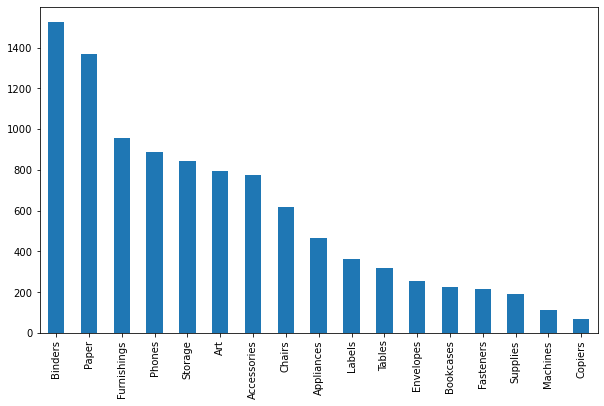

In [58]:

plt.figure(figsize=(10,6)) 
(data['Sub-Category'].value_counts()).plot(kind='bar')

<AxesSubplot:xlabel='Sub-Category'>

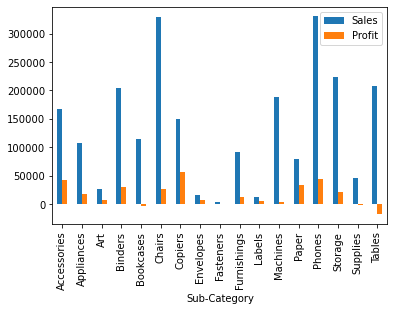

In [59]:
data.groupby('Sub-Category')['Sales','Profit'].agg(sum).plot(kind='bar')

Text(0.5, 1.0, 'Sub-Category')

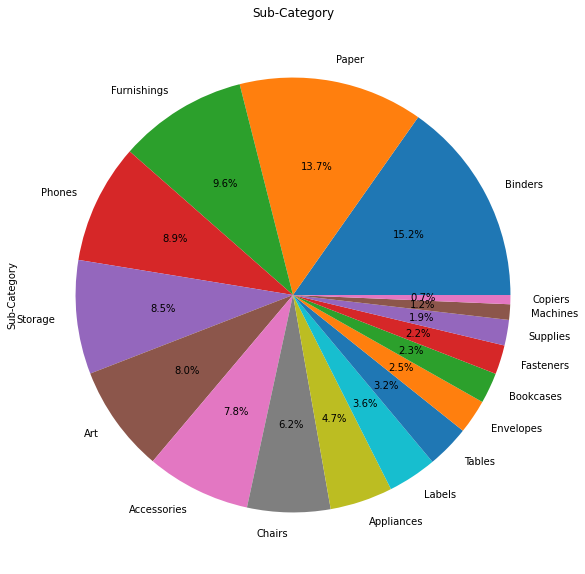

In [60]:

plt.figure(figsize=(10,10)) 
data['Sub-Category'].value_counts().plot.pie(autopct='%.1f%%') 
plt.title('Sub-Category')


Binders being the most sold product in sub-category list which comes under Office Supplies Category



# Discount Analysis

In [61]:


data['Discount'].value_counts()

0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: Discount, dtype: int64

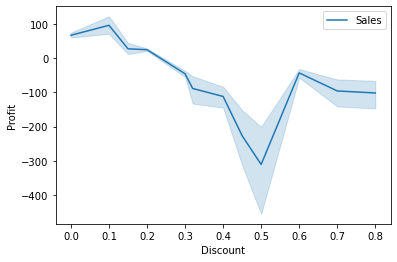

In [62]:

sns.lineplot(x='Discount',y='Profit',label='Sales',data=data) 
plt.legend()
plt.show()

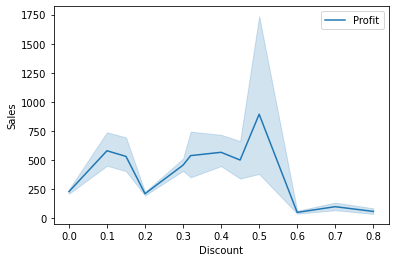

In [63]:
sns.lineplot(x='Discount',y='Sales',label='Profit',data=data) 
plt.legend() 
plt.show()


With the Discount of 50%, the Sales are pretty good, but the profit is very poor which results in Loss


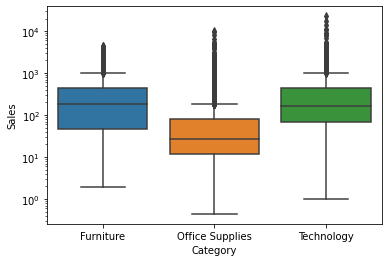

In [64]:


sns.boxplot(data=data,x='Category',y='Sales') 
plt.yscale('log') 
plt.show()

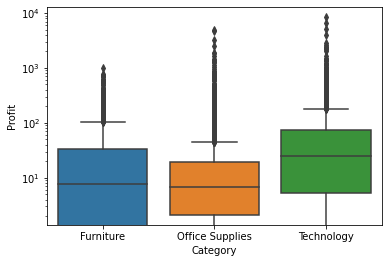

In [65]:

sns.boxplot(data=data,x='Category',y='Profit') 
plt.yscale('log') 
plt.show()

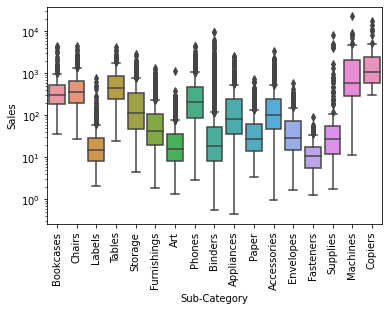

In [66]:

sns.boxplot(data=data,x='Sub-Category',y='Sales') 
plt.yscale('log') 
plt.xticks(rotation=90) 
plt.show()

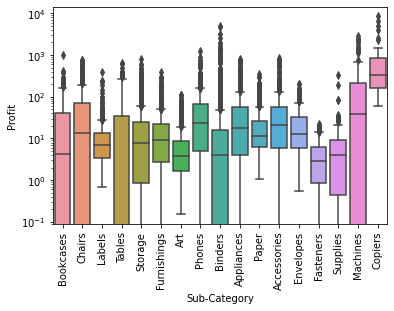

In [67]:


sns.boxplot(data=data,x='Sub-Category',y='Profit') 
plt.yscale('log') 
plt.xticks(rotation=90) 
plt.show()

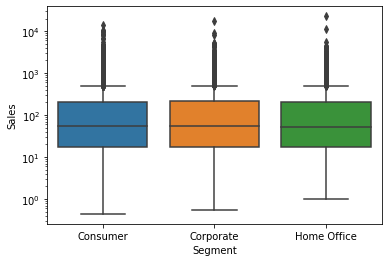

In [68]:
sns.boxplot(data=data,x='Segment',y='Sales') 
plt.yscale('log') 
plt.show()

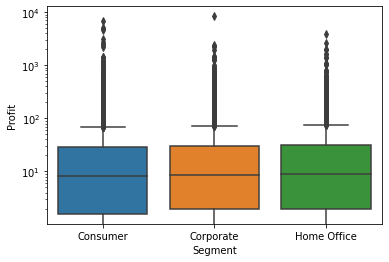

In [69]:
sns.boxplot(data=data,x='Segment',y='Profit') 
plt.yscale('log') 
plt.show()

<AxesSubplot:xlabel='Category', ylabel='count'>

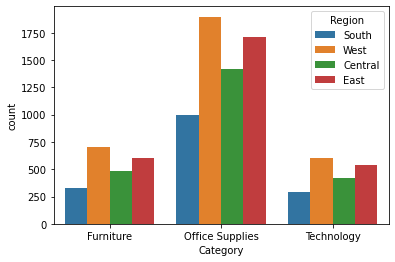

In [70]:
sns.countplot(x='Category',hue='Region',data=data)

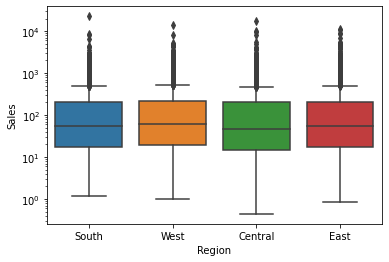

In [71]:

sns.boxplot(data=data,x='Region',y='Sales') 
plt.yscale('log') 
plt.show()

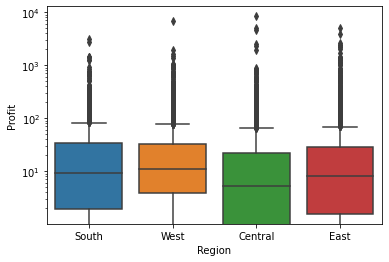

In [72]:

sns.boxplot(data=data,x='Region',y='Profit')
plt.yscale('log') 
plt.show()

# conclusion
> The product must sale with low/no space discount to become the best profitable
> Better minimize supplying furniture and the items in other categories that results in loss
> Texas and illinois must drop the suooly of furniture items in technology will enchance their profit (especially copiers)

# Thank you